In [3]:
from pathlib import Path

import numpy as np
import torch

from tqdm.auto import tqdm

import itertools

import os
from dotenv import find_dotenv, load_dotenv

load_dotenv(find_dotenv(), verbose=True)

True

# prepare data

In [4]:
from src.config.config import combine_cfgs, get_cfg_defaults
from src.data.datamodule import MyDataModule

In [5]:
# prepare optical flow
cfg = combine_cfgs('../src/config/experiments/algonauts2021_i3d_flow.yml')
dm = MyDataModule(cfg)
dm.prepare_data()
dm.setup()

In [10]:
num_videos = len(dm.dataset_train_val)

In [12]:
print(dm.dataset_train_val.__getitem__(0)[0].shape)

(2, 64, 224, 224)


In [13]:
chaotic_motions = []
vector_motions = []
for vid_idx in tqdm(range(num_videos)):
    flow_vid, fmri = dm.dataset_train_val.__getitem__(vid_idx)
    vector_motions.append(flow_vid.sum(-1).sum(-1).sum(-1))
    chaotic_motions.append(np.sqrt((flow_vid**2).sum(0)).sum())
chaotic_motions = np.asarray(chaotic_motions)
vector_motions = np.asarray(vector_motions)

  0%|          | 0/1000 [00:00<?, ?it/s]

In [14]:
chaotic_motions.shape

(1000,)

In [20]:
import seaborn as sns
import matplotlib.pyplot as plt

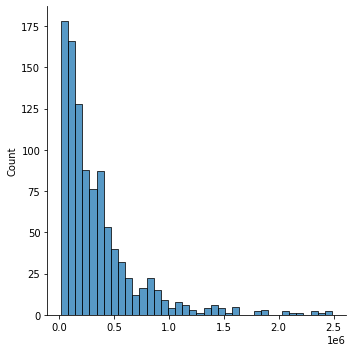

In [21]:
sns.displot(chaotic_motions)
plt.show()

In [16]:
np.save('./tmp/chaotic_motion.npy', chaotic_motions)